<a href="https://colab.research.google.com/github/Muhammad-Ali-29/Computer-vision-assignment/blob/main/assign2pract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/315_Birds_Species.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [24]:
len(os.listdir('/tmp/train/')) #numberr of classes

315

In [25]:
#importing libraries

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [26]:
IMAGE_SIZE = [224, 224]  #vgg takes input in 224 by 224

In [27]:
#train_path = os.path.abspath('/tmp/train')
#valid_path = os.path.abspath('/tmp/valid')
#train_path

In [28]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# won't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [29]:
 # useful for getting number of classes

folders = glob('/tmp/train/*')

print(type(folders))
print(folders)
len(folders)


       

<class 'list'>
['/tmp/train/CAPPED HERON', '/tmp/train/CINNAMON TEAL', '/tmp/train/ROCK DOVE', '/tmp/train/SPANGLED COTINGA', '/tmp/train/GOLDEN CHEEKED WARBLER', '/tmp/train/INDIAN PITTA', '/tmp/train/GOLDEN CHLOROPHONIA', '/tmp/train/PAINTED BUNTIG', '/tmp/train/BLACK-NECKED GREBE', '/tmp/train/AMERICAN KESTREL', '/tmp/train/REGENT BOWERBIRD', '/tmp/train/RED WINGED BLACKBIRD', '/tmp/train/RED TAILED THRUSH', '/tmp/train/NICOBAR PIGEON', '/tmp/train/BROWN THRASHER', '/tmp/train/IWI', '/tmp/train/HOUSE FINCH', '/tmp/train/BORNEAN BRISTLEHEAD', '/tmp/train/CUBAN TODY', '/tmp/train/ORIENTAL BAY OWL', '/tmp/train/DOUBLE BARRED FINCH', '/tmp/train/CURL CRESTED ARACURI', '/tmp/train/VIOLET GREEN SWALLOW', '/tmp/train/EASTERN MEADOWLARK', '/tmp/train/BROWN NOODY', '/tmp/train/SATYR TRAGOPAN', '/tmp/train/RED WISKERED BULBUL', '/tmp/train/CARMINE BEE-EATER', '/tmp/train/HOODED MERGANSER', '/tmp/train/BEARDED BARBET', '/tmp/train/GREAT KISKADEE', '/tmp/train/GRAY PARTRIDGE', '/tmp/train/DARK 

315

In [30]:

# flattening o/p layer
x = Flatten()(vgg.output)
# prediction layer
prediction = Dense(len(folders), activation='softmax')(x)

In [31]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [32]:
# tell the model what cost and optimization method to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
#Data Augmentation

from keras.preprocessing.image import ImageDataGenerator

#training data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#validation data augmentation
valid_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/tmp/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

valid_set = valid_datagen.flow_from_directory('/tmp/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')




Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


In [34]:
print(len(training_set))
print(len(valid_set))

2874
99


In [35]:
# fit the model
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/5
 103/2874 [>.............................] - ETA: 5:32:20 - loss: 9.0237 - accuracy: 0.0437

KeyboardInterrupt: ignored

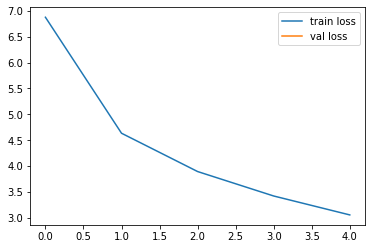

<Figure size 432x288 with 0 Axes>

In [35]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


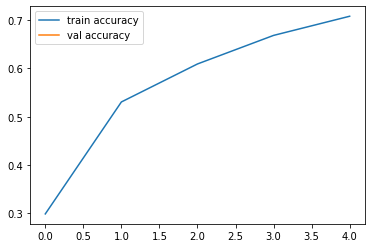

<Figure size 432x288 with 0 Axes>

In [36]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')
